#### Load Turicreate Library

In [1]:
import turicreate

#### Load the dataset

In [2]:
sales = turicreate.SFrame('https://courses.cs.washington.edu/courses/cse416/18sp/notebooks/Philadelphia_Crime_Rate_noNA.csv')

Downloading https://courses.cs.washington.edu/courses/cse416/18sp/notebooks/Philadelphia_Crime_Rate_noNA.csv to /var/tmp/turicreate-onlysaurabh2/219/4c28260a-070d-4091-bab2-15d49af61483.csv

Finished parsing file https://courses.cs.washington.edu/courses/cse416/18sp/notebooks/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.144833 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://courses.cs.washington.edu/courses/cse416/18sp/notebooks/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.129633 secs.

In [3]:
sales.head()

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


#### Exploring the dataset

In [5]:
turicreate.show(sales['CrimeRate'], sales['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

#### linear regression model using CrimeRate as our feature

In [8]:
crimeRate_model = turicreate.linear_regression.create(sales, target='HousePrice', features = ['CrimeRate'], validation_set = None, verbose = False)

#### Plot for the fitted regression line

In [12]:
import matplotlib.pyplot as plt

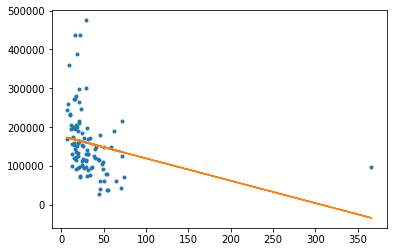

In [16]:
plt.plot(sales['CrimeRate'], sales['HousePrice'], '.',
        sales['CrimeRate'], crimeRate_model.predict(sales), '-')

#### Remove the outlier point which is the House Price at Center City

In [17]:
sales_NoCC = sales[sales['MilesPhila']!=0.0]

In [18]:
turicreate.show(sales_NoCC['CrimeRate'], sales_NoCC['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

#### Fit a linear regression model for the sales dataset without the city center outlier

In [20]:
sales_NoCC_model = turicreate.linear_regression.create(sales_NoCC, target='HousePrice', features = ['CrimeRate'], validation_set = None, verbose = False)

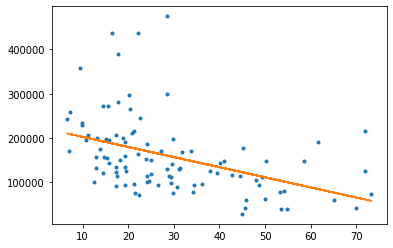

In [22]:
plt.plot(sales_NoCC['CrimeRate'], sales_NoCC['HousePrice'], '.',
        sales_NoCC['CrimeRate'], sales_NoCC_model.predict(sales_NoCC), '-')

#### Comparing the coefficients obtained for the two models

In [24]:
crimeRate_model.coefficients

name,index,value,stderr
(intercept),None,176626.04688088183,11245.588219378815
CrimeRate,None,-576.8049490581075,226.90225950965325


In [25]:
sales_NoCC_model.coefficients

name,index,value,stderr
(intercept),None,225204.60430309846,16404.024751386656
CrimeRate,None,-2287.6971744328953,491.53747812308956


#### Plotting the two models together

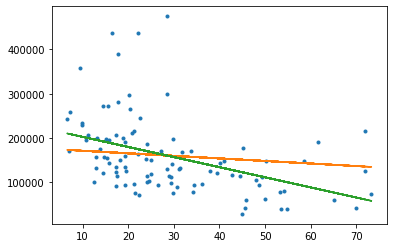

In [26]:
plt.plot(sales_NoCC['CrimeRate'], sales_NoCC['HousePrice'], '.',
         sales_NoCC['CrimeRate'], crimeRate_model.predict(sales_NoCC), '-',
        sales_NoCC['CrimeRate'], sales_NoCC_model.predict(sales_NoCC), '-')

#### Confirm the above calculations by looking at the plots. The orange line is the model trained removing Center City, and the green line is the model trained on all the data. Notice how much steeper the green line is, since the drop in value is much higher according to this model.

#### Removing high value outlier neighbourhoods and redoing the analysis

#### Trying to find out wether the outlier on the y-axis act as the high leverage points

In [36]:
sales_nohighend = sales_NoCC[sales_NoCC['HousePrice']<350000]

In [37]:
crimeRate_nohighend_model = turicreate.linear_regression.create(sales_nohighend,target = 'HousePrice', features = ['CrimeRate'], validation_set = None, verbose = False)

#### Do the coefficients change much?

In [38]:
sales_NoCC_model.coefficients

name,index,value,stderr
(intercept),None,225204.60430309846,16404.024751386656
CrimeRate,None,-2287.6971744328953,491.53747812308956


In [39]:
crimeRate_nohighend_model.coefficients

name,index,value,stderr
(intercept),None,199073.5896152513,11932.510110455862
CrimeRate,None,-1837.7128098887245,351.5196093328531


#### As we see from above the coefficients do not change much, not as much as the change between the high leverage point and the model with all the observations. Thus we cannot say that the high end outliers are highly influential.

#### Plotting the results from above we get

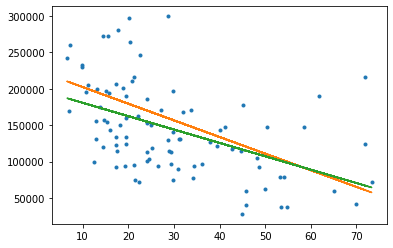

In [42]:
plt.plot(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'], '.',
         sales_nohighend['CrimeRate'], sales_NoCC_model.predict(sales_nohighend), '-',
       sales_nohighend['CrimeRate'], crimeRate_nohighend_model.predict(sales_nohighend), '-')

### Compare the two models
Confirm the above calculations by looking at the plots. The orange line is the no high-end model, and the green line is the no-city-center model.